In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Inspect Data

In [3]:
# all_data = pd.read_csv('all_data.csv')
data = pd.concat([pd.read_csv('rawdata/sandiego.csv'), pd.read_csv('rawdata/losangeles.csv')])


In [4]:
data['price'] =data['price'].str.replace('$', '').str.replace(',', '').astype(float)
for c in data.columns:
    if data[c].dtype == "int64" or data[c].dtype == "float64":
        print(f"'{c}', ", end='')

'id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 

In [5]:
data = data[['price', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

In [6]:
print(data.isnull().sum())
data = data.dropna()
print(data.isnull().sum())

price                                            8836
host_listings_count                                 2
host_total_listings_count                           2
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                        8838
bedrooms                                         2904
beds                                             8997
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights                              0
minimum_nights_avg_ntm                              0
maximum_nights_avg_ntm                              0
availability_30                                     0
availability_60             

In [5]:
# Remove rows with NaN in 'price' column
# all_data = all_data.dropna(subset=['price'])
# sd_data = sd_data.dropna(subset=['price'])
# # Set NaN values in 'last_review' and 'reviews_per_month' to 0
# all_data.fillna({'last_review': 0, 'reviews_per_month':0}, inplace=True)
# sd_data.fillna({'last_review': 0, 'reviews_per_month':0}, inplace=True)
# total_nan = data.isnull().sum()
# print('total nan value:', total_nan)

## Crop Outliners

In [8]:
# https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns, th1=0.01, th3=0.90, multiplier=1.5):
    for column in columns:
        Q1 = df[column].quantile(th1)
        Q3 = df[column].quantile(th3)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        print(f"column: {column}, lower_bound: {lower_bound}, upper_bound: {upper_bound}")
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df
# consider: Removing Outliers using Standard Deviation (probably not good because data is not normally distributed)
# data2 columns: 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm'
data2 = remove_outliers_iqr(data, ['price', 'number_of_reviews_ltm', 'minimum_nights', 'calculated_host_listings_count'],th1=0.1, th3=0.80, multiplier=1)
# sd_data3 = remove_outliers_iqr(sd_data2, ['price', 'number_of_reviews_ltm', 'minimum_nights', 'calculated_host_listings_count'],th1=0.1, th3=0.90, multiplier=1)

column: price, lower_bound: -204.0, upper_bound: 612.0
column: number_of_reviews_ltm, lower_bound: -29.0, upper_bound: 58.0
column: minimum_nights, lower_bound: -28.0, upper_bound: 59.0
column: calculated_host_listings_count, lower_bound: -11.0, upper_bound: 25.0


## Normalization: Minmax implementation

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data2_norm = pd.DataFrame(scaler.fit_transform(data2), columns=data2.columns)
data2_norm.head()

,price,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.318482,0.000000,0.000000,0.095271,0.902876,0.333333,0.142857,0.130435,0.15,0.000000,...,0.155556,0.753425,0.143803,0.000000,0.000000,0.000000,0.04,0.00,0.0,0.055039
1,0.148515,0.000349,0.000237,0.117531,0.849592,0.066667,0.071429,0.043478,0.00,0.086207,...,0.188889,0.443836,0.000946,0.017241,0.045455,0.041667,0.00,0.08,0.0,0.000000
2,0.364686,0.001394,0.001898,0.118500,0.837646,0.333333,0.142857,0.086957,0.15,0.051724,...,0.522222,0.882192,0.100284,0.241379,0.000000,0.166667,0.20,0.00,0.0,0.044317
3,0.305281,0.000000,0.000237,0.120943,0.832098,0.066667,0.071429,0.086957,0.15,0.051724,...,0.222222,0.134247,0.311258,0.362069,0.090909,0.000000,0.04,0.00,0.0,0.142959
4,0.064356,0.000349,0.000474,0.091615,0.895942,0.066667,0.071429,0.043478,0.05,0.517241,...,0.000000,0.101370,0.184484,0.000000,0.000000,0.041667,0.00,0.08,0.0,0.088635


## PCA

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)

def pca_2dplot(pca, df, scores):
    # biplot. source: Introduction to Statistical Learning https://github.com/intro-stat-learning/ISLP_labs
    i, j = 0, 1 # which components
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    point_size = 0.2  # Adjust this value to make the points smaller or larger
    vector_scale = 40
    text_size = 8  # Adjust this value to make the text smaller

    ax.scatter(scores[:,0], scores[:,1], s=point_size)
    ax.set_xlabel('PC%d' % (i+1))
    ax.set_ylabel('PC%d' % (j+1))
    for k in range(pca.components_.shape[1]):
        ax.arrow(0, 0, pca.components_[i,k]*vector_scale, pca.components_[j,k]*vector_scale)
        # print(data2.columns[k], f'(i,k)={i},{k}, (j,k)={j},{k}',  pca.components_[i,k], pca.components_[j,k])
        ax.text(pca.components_[i,k]*vector_scale,
                pca.components_[j,k]*vector_scale,
                df.columns[k],
                size=text_size)
    plt.show()

def pca_3dplot(pca,df,scores):
    i, j, k = 0, 1, 2  # which components for 3D plot

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    # Set the size of the points
    point_size = 0.1  # Adjust this value to make the points smaller or larger
    vector_scale = 1.5  # Adjust this value to make the vectors larger or smaller
    text_size = 8  # Adjust this value to make the text smaller


    # 3D scatter plot with adjusted point size
    # ax.scatter(scores[:, i], scores[:, j], scores[:, k], s=point_size)

    ax.set_xlabel('PC%d' % (i + 1))
    ax.set_ylabel('PC%d' % (j + 1))
    ax.set_zlabel('PC%d' % (k + 1))

    for l in range(pca.components_.shape[1]):
        ax.quiver(0, 0, 0, 
                  pca.components_[i, l] * vector_scale, 
                  pca.components_[j, l] * vector_scale, 
                  pca.components_[k, l] * vector_scale, 
                  length=0.1, color='r')
        ax.text(pca.components_[i, l] * vector_scale/6, 
                pca.components_[j, l] * vector_scale/6, 
                pca.components_[k, l] * vector_scale/6, 
                df.columns[l], 
                size=text_size)

    plt.show()

def pca_function(df):

    # print(f"df means:\n{df.mean()}\n\ndf variance:\n{df.var()}")

    # scaler
    scaler = StandardScaler(with_std=True, with_mean=True)
    scaled_data = scaler.fit_transform(df)

    # check for NaN value
    # has_nan = np.isnan(scaled_data).sum()
    # print(f"Array has NaN values: {has_nan}")
    # nan_indices = np.argwhere(np.isnan(scaled_data))
    # print("Indices of NaN values:")
    # print(nan_indices)

    # PCA
    pca = PCA()
    pca.fit(scaled_data)
    # print('PCA means: ', pca.mean_)  # means should be 0 after scaler()?

    scores = pca.transform(scaled_data)
    print('PCA components_: ', pca.components_.shape)

    pca_2dplot(pca,df, scores)
    pca_3dplot(pca, df, scores)

### PCA original data

PCA components_:  (29, 29)


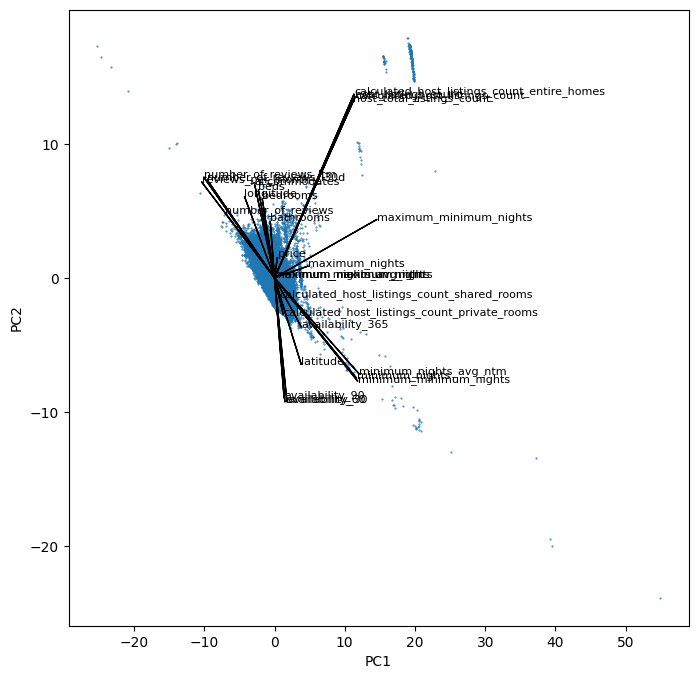

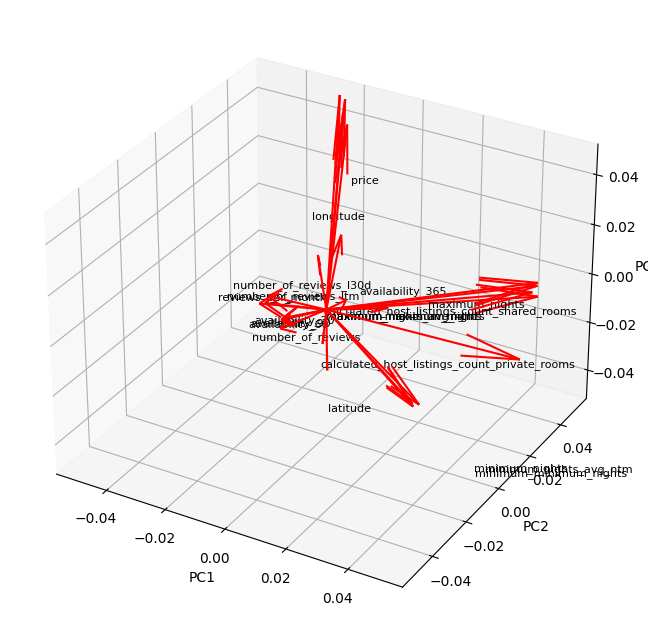

In [12]:
pca_function(data)

### PCA normalized and cropped data

PCA components_:  (29, 29)


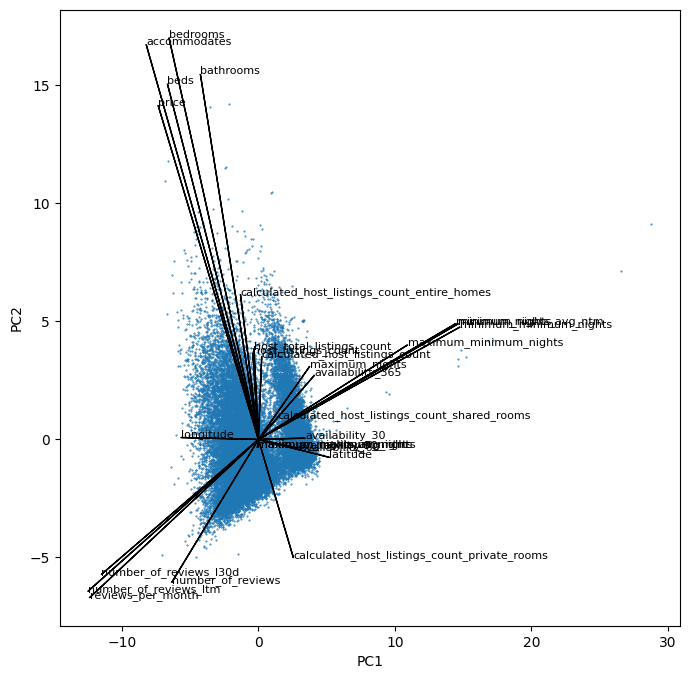

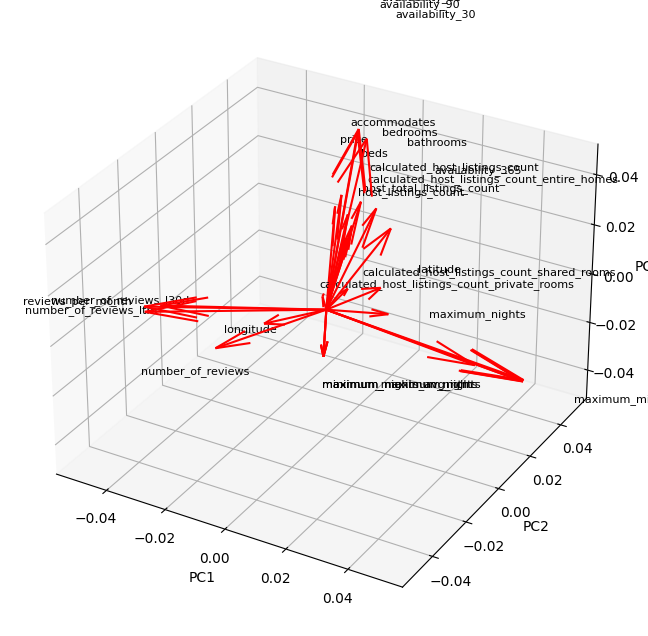

In [13]:
pca_function(data2_norm)

Text(0, 0.5, 'Proportion of Variance Explained')

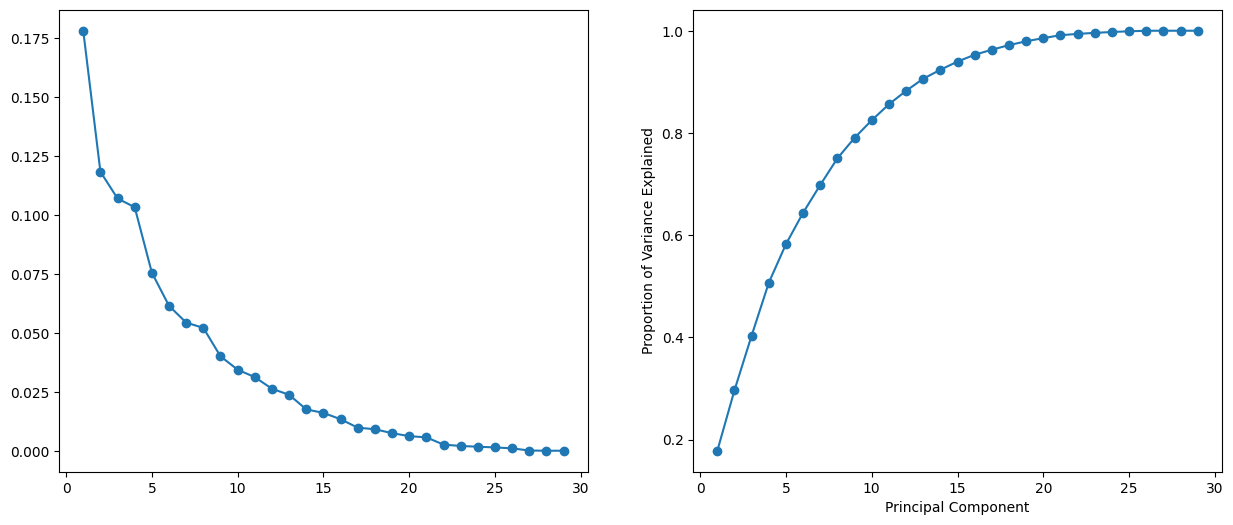

In [14]:
    # scaler
scaler = StandardScaler(with_std=True, with_mean=True)
scaled_data = scaler.fit_transform(data2_norm)

# PCA
pca = PCA()
pca.fit(scaled_data)
# print('PCA means: ', pca.mean_)  # means should be 0 after scaler()?

scores = pca.transform(scaled_data)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pca.explained_variance_ratio_,
        marker='o')

ax = axes[1]
ax.plot(ticks,
        pca.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')


### Top Features for each PC

In [15]:
def features_on_pca(df,pca, comp_n):
    print("PC", comp_n)
    # print(df.columns)
    # print(pca.components_[comp_n])

    # print("Og values:\n")
    # for i, value in enumerate(sorted(zip(pca.components_[comp_n],df.columns))):
    #     print(i, value)

    print("Top 5 correlated features:")
    for i, value in enumerate(sorted(zip(abs(pca.components_[comp_n]),df.columns), reverse=True)):
        print(i, value)
        if i==4: break
    print('\n')

In [16]:
for i in range(8):
    features_on_pca(data2_norm, pca, i)

PC 0
Top 5 correlated features:
0 (0.3690784560142205, 'minimum_minimum_nights')
1 (0.36618772550173484, 'minimum_nights')
2 (0.36202276144624257, 'minimum_nights_avg_ntm')
3 (0.31228479839850326, 'number_of_reviews_ltm')
4 (0.30917768455070854, 'reviews_per_month')


PC 1
Top 5 correlated features:
0 (0.42521700808887736, 'bedrooms')
1 (0.41815836300724857, 'accommodates')
2 (0.386714078543557, 'bathrooms')
3 (0.376364693557897, 'beds')
4 (0.35368930491721695, 'price')


PC 2
Top 5 correlated features:
0 (0.5017497330439397, 'availability_60')
1 (0.4905478591863536, 'availability_90')
2 (0.4737087785242726, 'availability_30')
3 (0.2110567982949391, 'availability_365')
4 (0.1749897660058808, 'calculated_host_listings_count')


PC 3
Top 5 correlated features:
0 (0.5638989068230575, 'maximum_maximum_nights')
1 (0.563898833699419, 'maximum_nights_avg_ntm')
2 (0.5638987830273612, 'minimum_maximum_nights')
3 (0.10695673890443427, 'availability_60')
4 (0.10287542667135599, 'availability_90')

## Trying out other methods

In [62]:
from sklearn.manifold import TSNE

embeded = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(data2_norm)

In [ ]:
def plot_3d_tsne(embedded):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    ax.scatter(embedded[:, 0], embedded[:, 1], embedded[:, 2], c='blue', s=1, alpha=0.6)

    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title('3D t-SNE Plot')

    plt.show()

# Call the function to plot
plot_3d_tsne(embeded)


In [84]:
data2_norm.shape

(9336, 29)

In [23]:
## K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=2, n_init=20).fit(scores)

In [24]:
kmeans.labels_

array([3, 0, 3, ..., 0, 0, 1])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

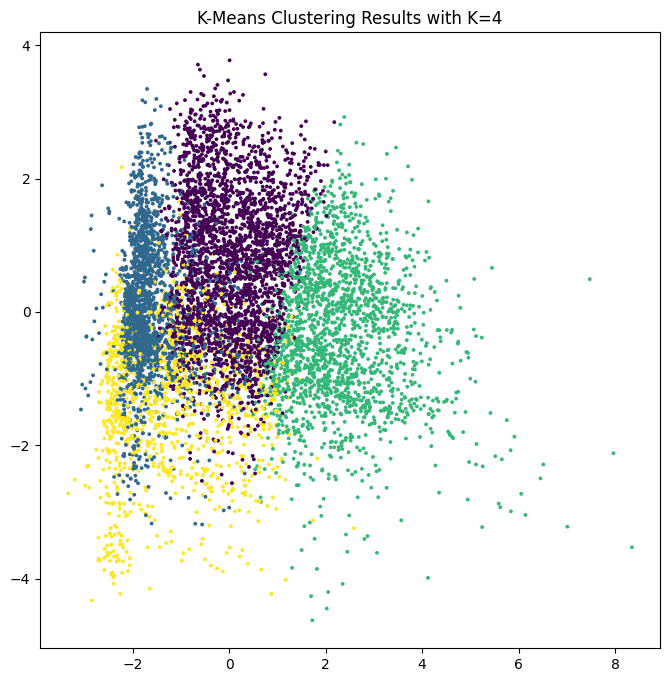

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1], c=kmeans.labels_, s=3)
ax.set_title("K-Means Clustering Results with K=4")

vector_scale=5
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, pca.components_[i,k]*vector_scale, pca.components_[j,k]*vector_scale)
    # print(data2.columns[k], f'(i,k)={i},{k}, (j,k)={j},{k}',  pca.components_[i,k], pca.components_[j,k])
    ax.text(pca.components_[0,k]*vector_scale,
            pca.components_[1,k]*vector_scale,
            test_df.columns[k])

In [28]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(scaled_data)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [30]:
from ISLP.cluster import compute_linkage
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)

In [ ]:
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=4,
           above_threshold_color='black')